In [22]:
import numpy as np
import pandas as pd

data = pd.read_csv('CC GENERAL.csv')
data.drop('CUST_ID', axis=1, inplace=True)
data.fillna(method ='ffill', inplace=True)

def kmeans(data, k, max_iters=100):
    centroids = data.sample(n=k).values
    
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(data.values[:, np.newaxis] - centroids, axis=2), axis=1)
        
        new_centroids = np.array([data.values[labels == j].mean(axis=0) for j in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return labels, centroids



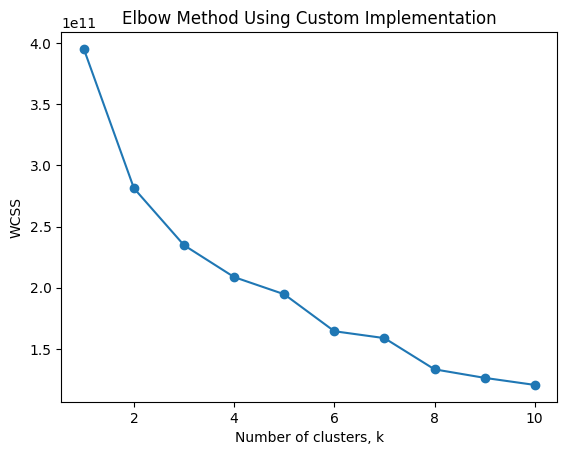

Optimal value of k based on slope difference using custom implementation is: 2


In [23]:
import numpy as np
import matplotlib.pyplot as plt

def wcss(data, labels, centroids):
    return sum(np.sum((data.values[i] - centroids[labels[i]])**2) for i in range(data.shape[0]))

wcss_values = []
ks = list(range(1, 11))

for k in ks:
    labels, centroids = kmeans(data, k)
    wcss_values.append(wcss(data, labels, centroids))

plt.plot(ks, wcss_values, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('WCSS')
plt.title('Elbow Method Using Custom Implementation')
plt.show()

slopes = [(wcss_values[i] - wcss_values[i-1]) for i in range(1, len(wcss_values))]
slope_diffs = [slopes[i] - slopes[i-1] for i in range(1, len(slopes))]
k_optimal_custom_slope = slope_diffs.index(max(slope_diffs)) + 2 

print(f"Optimal value of k based on slope difference using custom implementation is: {k_optimal_custom_slope}")


C:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: Future

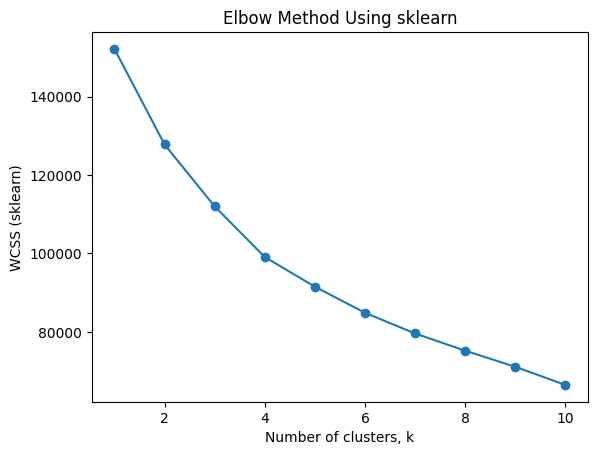

Optimal value of k based on slope difference is: 2


In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

ks = list(range(1, 11))
wcss_sklearn = []

for k in ks:
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(data_scaled)
    wcss_sklearn.append(kmeans.inertia_)

# Plotting WCSS values
plt.plot(ks, wcss_sklearn, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('WCSS (sklearn)')
plt.title('Elbow Method Using sklearn')
plt.show()

slopes = [(wcss_sklearn[i] - wcss_sklearn[i-1]) for i in range(1, len(wcss_sklearn))]
slope_diffs = [slopes[i] - slopes[i-1] for i in range(1, len(slopes))]
k_optimal_slope = slope_diffs.index(max(slope_diffs)) + 2 

print(f"Optimal value of k based on slope difference is: {k_optimal_slope}")
